In [18]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1,2], 'b':[True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [19]:
param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [20]:
from sklearn.preprocessing import PolynomialFeatures # 데이터를 다차원으로 변환
from sklearn.linear_model import LinearRegression # 선형회귀 -> 비선형회귀
# train / validation / test
# 전처리를 어느 시점에 해야 하는가
# 전처리후 나누는가
# 나누고 전처리를 하는가 : 순서적으로 적용
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), #비선형 회귀
                        LinearRegression(**kwargs))

In [41]:
import numpy as np

def make_data(N, err=1.0, rseed=1):  # 학습을 위해서 데이터 생성 
    rng = np.random.RandomState(rseed)  # seed값 -> 의사난수의 시작점 지정 (실제 난수처럼 보이게)
    X = rng.rand(N, 1) ** 2  
    y = 10-1. / (X.ravel() + 0.1)  # ravel : 데이터를 1차원으로 배열해줌 
    
    if err > 0:  # 에러가 나면
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


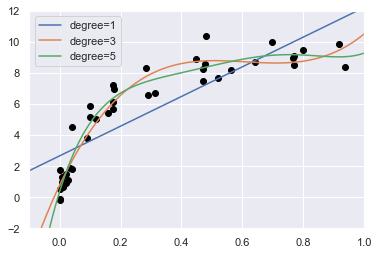

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test = np.linspace(-0.1,1.1,500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree' : np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize' : [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [46]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [48]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [49]:
grid.cv_results_['params']

[{'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 0},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 1},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 2},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 3},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 4},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 5},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 6},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 7},
 {'linearregression__fit_intercept': True,
  'linearregr

In [50]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [51]:
grid.best_score_

0.8972710305736544

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

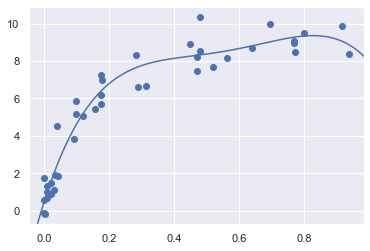

In [52]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim)

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

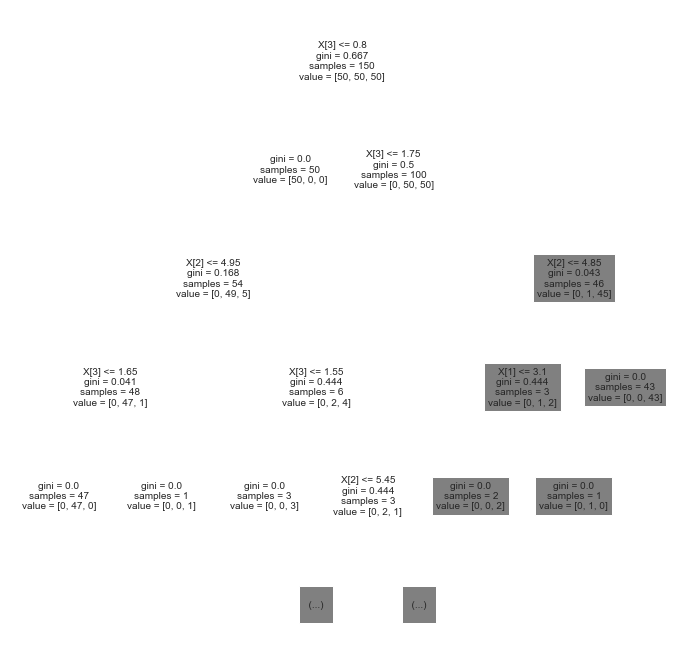

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf, max_depth=4, fontsize=10)

In [55]:
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [56]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,  # dot로 출력
                    feature_names=feature_names)

    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png() # png 이미지로 생성
    return Image(image)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=3,
                          n_redundant=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
# hyper parameter => GridSearchCV
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [8]:
preds = dt.predict(X)
(y == preds).mean()

1.0

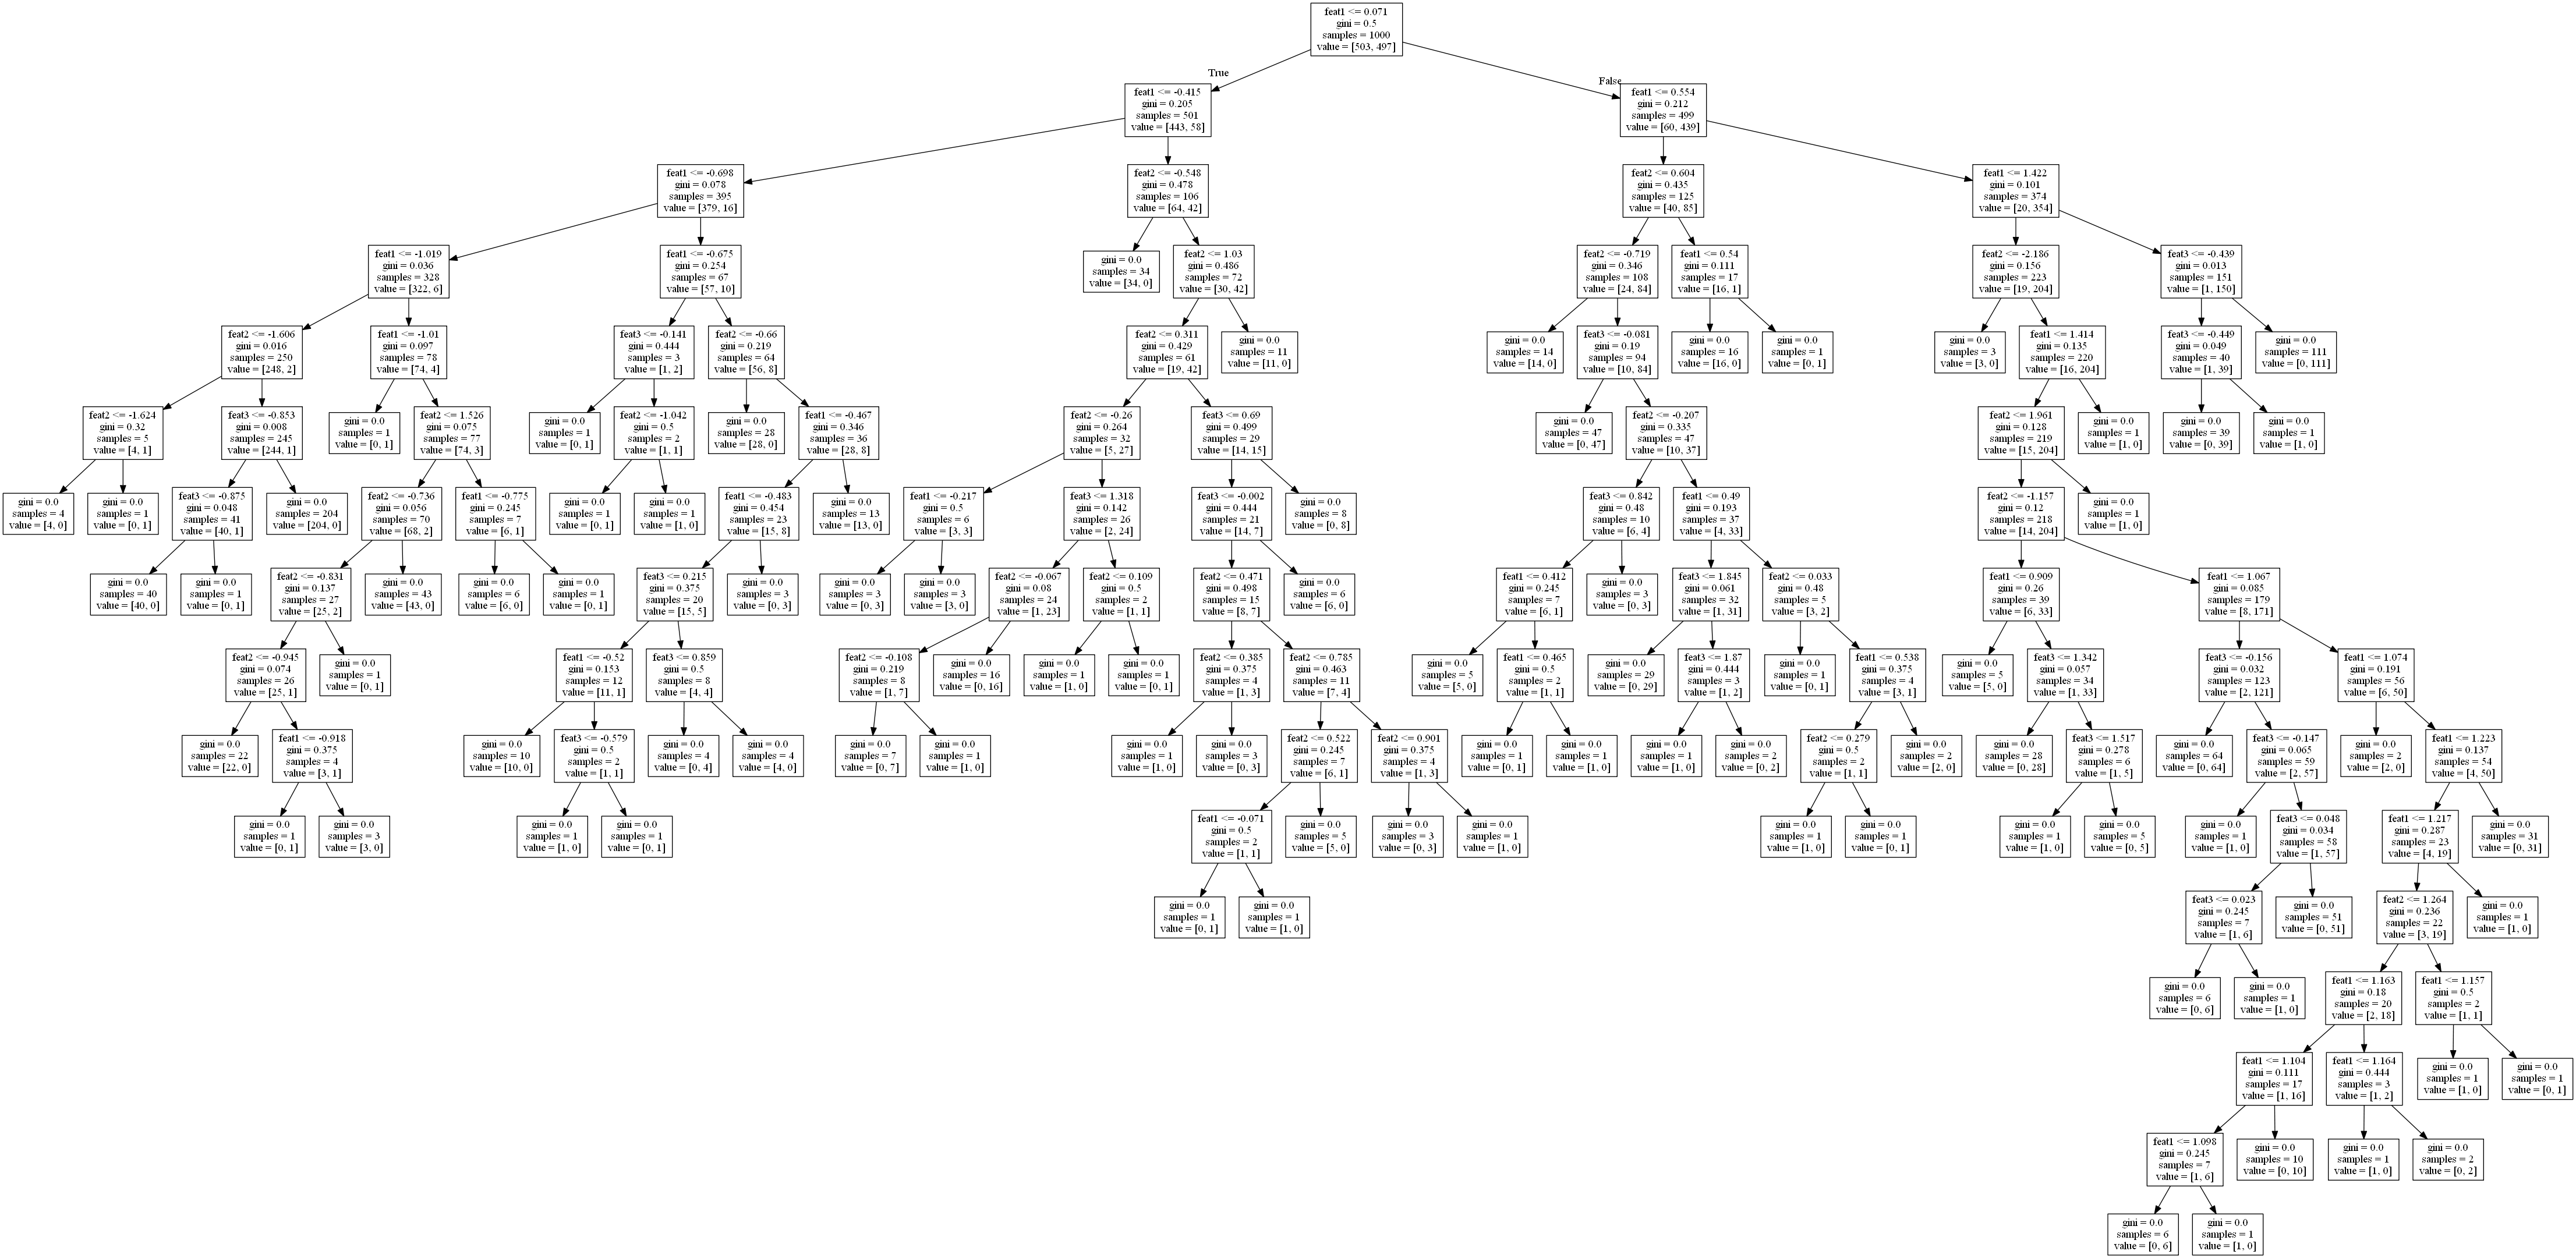

In [13]:
draw_decision_tree(dt, ["feat1","feat2","feat3"])

In [ ]:
# RF (random forest)
- ensemble
- bagging : bootstrap + aggregation
- voting : 연속성 - 평균, 범주형 - 다수결의 원리
- stacking : 여러모델의 결과로 다시 모델을 생성 (DT, RF, ADA)
- hyper parameter
    - n_estimators
    - n_samples
    - max_features

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
RandomForestClassifier()

RandomForestClassifier()

In [24]:
rf.fit(X,y)

RandomForestClassifier()

In [25]:
print("Accuracy:\t", (y == rf.predict(X)).mean())

Accuracy:	 1.0


In [19]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '특성중요도')

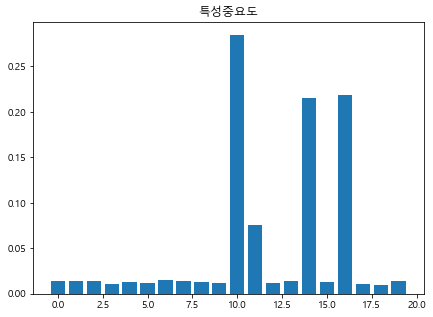

In [26]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)),
       rf.feature_importances_)
ax.set_title("특성중요도")

In [27]:
print("종속변수갯수", rf.n_classes_)
print("클래스의종류", rf.classes_)
print("특성수", rf.n_features_)
print("모델", rf.estimators_)

종속변수갯수 2
클래스의종류 [0 1]
특성수 20
모델 [DecisionTreeClassifier(max_features='auto', random_state=2010086530), DecisionTreeClassifier(max_features='auto', random_state=1612866194), DecisionTreeClassifier(max_features='auto', random_state=1945109458), DecisionTreeClassifier(max_features='auto', random_state=175584843), DecisionTreeClassifier(max_features='auto', random_state=1093479052), DecisionTreeClassifier(max_features='auto', random_state=1245952274), DecisionTreeClassifier(max_features='auto', random_state=526540555), DecisionTreeClassifier(max_features='auto', random_state=105653611), DecisionTreeClassifier(max_features='auto', random_state=787757103), DecisionTreeClassifier(max_features='auto', random_state=1518668441), DecisionTreeClassifier(max_features='auto', random_state=385287108), DecisionTreeClassifier(max_features='auto', random_state=298405134), DecisionTreeClassifier(max_features='auto', random_state=1282190493), DecisionTreeClassifier(max_features='auto', random_state=492893

In [28]:
# Tree regression 회귀 : 외삽데이터는 불가

In [30]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
boston = load_boston() # sklearn.utils.Bunch
print(type(boston))
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(X,Y)
print("변수 중요도 score에 의해 정렬 :")

<class 'sklearn.utils.Bunch'>
변수 중요도 score에 의해 정렬 :


In [31]:
#입력된 변수 순서와 같음
print(list(zip(map(lambda x:round(x,2),
                  rf.feature_importances_), names)))

[(0.04, 'CRIM'), (0.0, 'ZN'), (0.01, 'INDUS'), (0.0, 'CHAS'), (0.03, 'NOX'), (0.42, 'RM'), (0.01, 'AGE'), (0.07, 'DIS'), (0.0, 'RAD'), (0.01, 'TAX'), (0.02, 'PTRATIO'), (0.01, 'B'), (0.38, 'LSTAT')]


In [45]:
#내림차순으로 정렬해서 출력해 보시오
print(list(sorted(zip(map(lambda x:round(x,2),
                  rf.feature_importances_), names),reverse=True)))

[(0.42, 'RM'), (0.38, 'LSTAT'), (0.07, 'DIS'), (0.04, 'CRIM'), (0.03, 'NOX'), (0.02, 'PTRATIO'), (0.01, 'TAX'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


In [32]:
len(names)

13

Text(0.5, 1.0, 'feature importance')

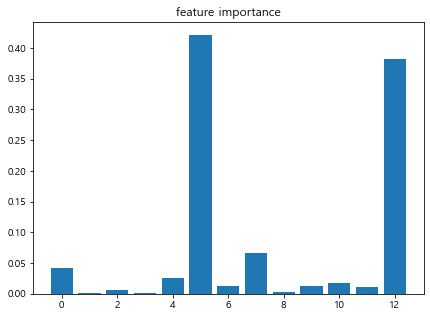

In [34]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)),
       rf.feature_importances_)
ax.set_title('feature importance')

In [ ]:
# 평가 - randomForestRegression(회귀)
- mse, mae, 결정계수

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
pred = rf.predict(X)
mean_squared_error(Y, pred)

1.4325355316205524

In [50]:
mean_absolute_error(Y, rf.predict(X))

0.7925988142292477

In [51]:
r2_score(Y, rf.predict(X))

0.9830307621024382

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test))  

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [54]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file="tree.dot",
               class_names=["악성", "양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

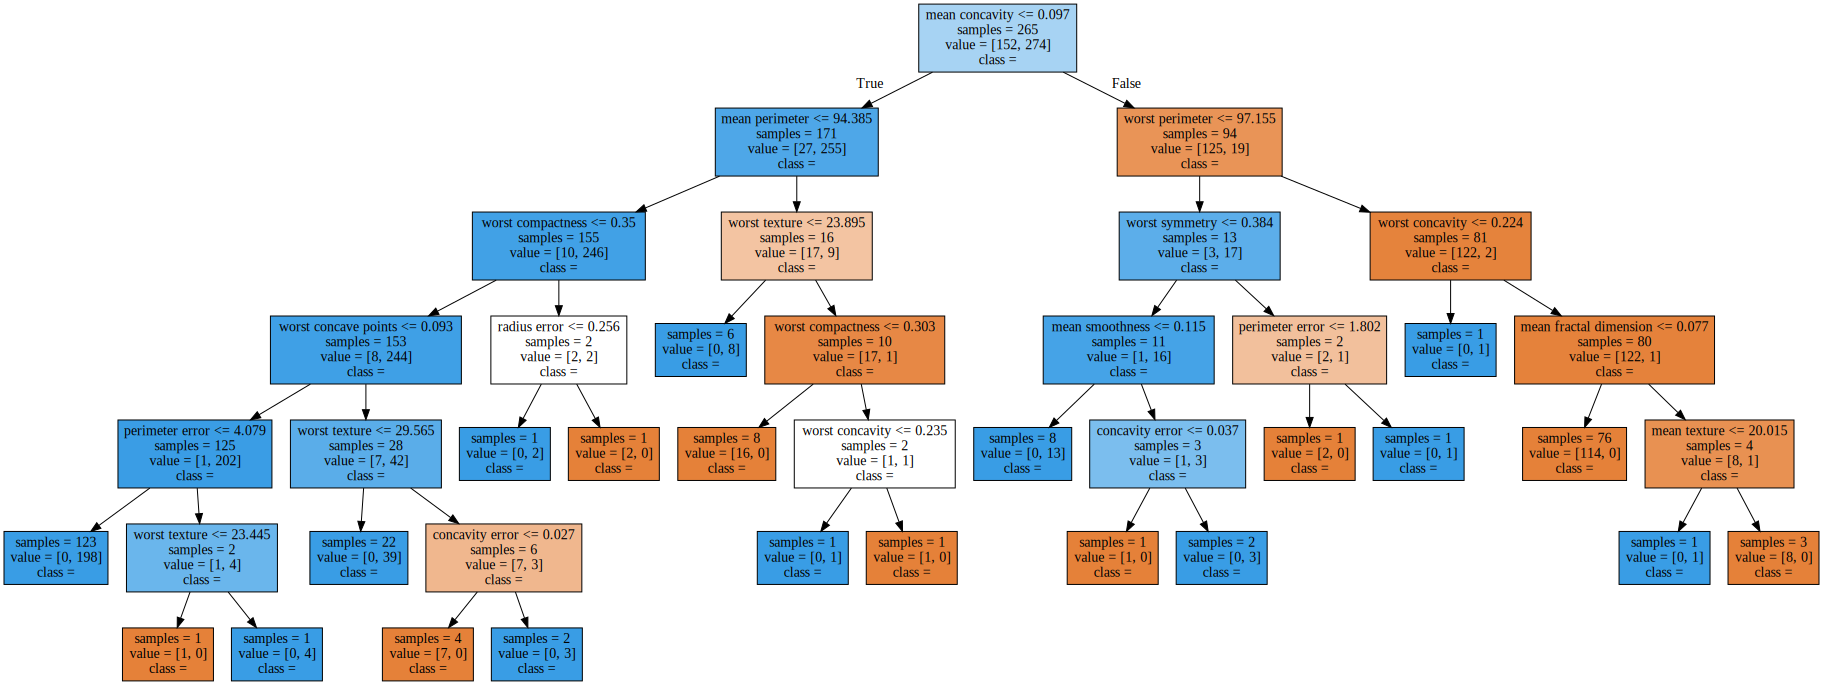

In [55]:
import graphviz
with open("tree.dot", "rt", encoding="UTF-8") as f:
    dot_gropth = f.read()
display(graphviz.Source(dot_gropth))

In [ ]:
# 문제
- load_breast_cancer 데이터를 사용
- n_estimators = [12,24,36,48,60]
- min_samples_leaf = [1,2,4,8,16]
- 최적의 파라미터를 결정하세요

In [90]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [12,24,36,48,60],
             'min_samples_leaf': [1,2,4,8,16]}
grid = GridSearchCV(forest,param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'min_samples_leaf': [1, 2, 4, 8, 16],
                         'n_estimators': [12, 24, 36, 48, 60]})

In [92]:
grid.best_params_

{'min_samples_leaf': 2, 'n_estimators': 48}

In [93]:
grid.best_estimator_

RandomForestClassifier(min_samples_leaf=2, n_estimators=48, random_state=0)

In [94]:
grid.best_score_

0.9577564979480165

In [96]:
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [100]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
learner = RandomForestClassifier(random_state=2)
param_grid = {'n_estimators' : [12,24,36,48,60],
             'min_samples_leaf': [1,2,4,8,16]}
# 사용자가 scorer를 생성해서 대체함
# 모델 평가 방법이 default는 accuracy
# roc curve 대각선이면 50%, 100%
def auc_scorer(target_score, prediction):
    auc_value = roc_auc_score(prediction, target_score)
    return auc_value
scorer = make_scorer(auc_scorer, greater_is_better=True)

In [101]:
grid_obj = GridSearchCV(learner,param_grid, scorer)
grid_obj.fit(X_train_scaled, y_train)
grid_obj.best_params_

C:\Users\020\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=make_scorer(auc_scorer) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'min_samples_leaf': 2, 'n_estimators': 12}

In [102]:
# 예측하고 평가
scaler = MinMaxScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [103]:
pred=grid_obj.predict(X_test_scaled) # 자동으로 최적모델을 호출

In [104]:
(pred==y_test).mean()

0.965034965034965

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.965034965034965

In [ ]:
# 문제
- iris 데이터를 로딩
- 데이터를 분할(train, test)
- 사전에 모델학습이 이루어져야함
- 변수중요도부터 selectFromModel 함수를 사용해서 변수 선택 (threshold=0.15%) 이상만 선택
- RandomForest를 이용해서 분류한 다음 분류 정확도로 평가하시오
- 변수 중요도를 시각화 하시오
- estimator_[0]을 시각화 하시오

In [150]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
Y = iris.target
feat_labels = iris.feature_names

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [144]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [145]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [151]:
for f in zip(feat_labels, clf.feature_importances_):
    print(f)

('sepal length (cm)', 0.10758403102260854)
('sepal width (cm)', 0.01527984736661282)
('petal length (cm)', 0.4322987594678901)
('petal width (cm)', 0.44483736214288855)


In [154]:
# 변수 중요도가 있는 모델에서 사용 (for 문을 이용해서 사용가능)
sfm = SelectFromModel(clf, threshold=0.15)
sfm.fit(X_train, y_train) # 변수 선택
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

petal length (cm)
petal width (cm)


In [160]:
# 데이터 변형 : fit - transform
# 모델을 학습 : fit - predict
X_important_train = sfm.transform(X_train) # 변수를 4개에서 2개로 줄여줌
X_important_test = sfm.transform(X_test) # same

clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

clf_important.fit(X_important_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred) # 과적합

0.9166666666666666

In [162]:
y_important_pred=clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred) # 일반화 된 경우

0.9

Text(0.5, 1.0, 'feature importances')

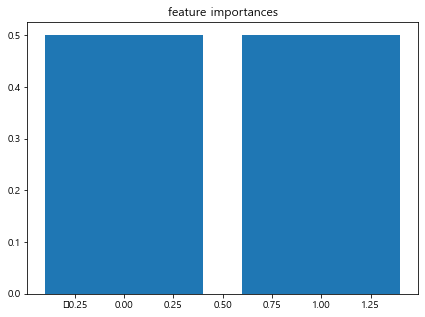

In [169]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(clf_important.feature_importances_)),
      clf_important.feature_importances_)
ax.set_title('feature importances')

In [166]:
names=[]
for index in sfm.get_support(indices=True):
    names.append(iris.feature_names[index])

['petal length (cm)', 'petal width (cm)']


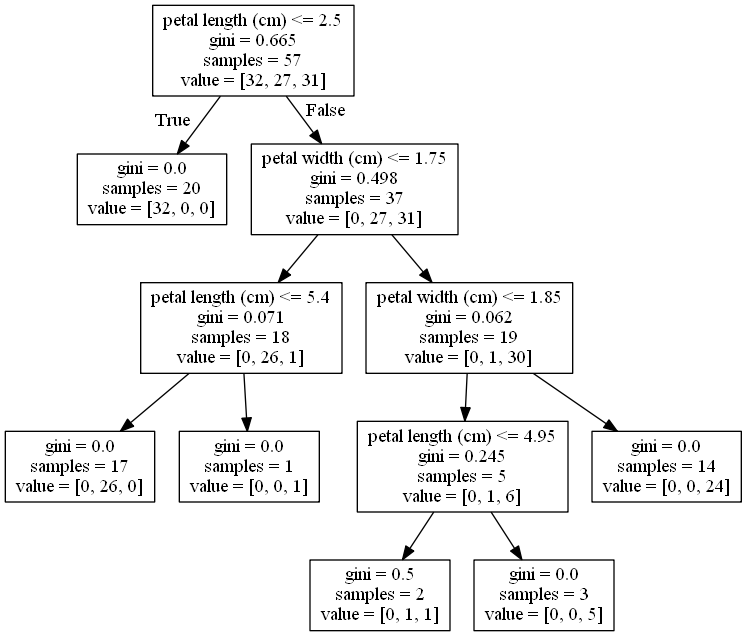

In [167]:
print(names)
draw_decision_tree(clf_important.estimators_[0], names) #특징

In [170]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [171]:
clf.feature_importances_
print(clf.predict([[0,0,0,0]]))
clf.score(X,y)

[1]


0.983

In [185]:
#문제 : test data에 대하여 scoring해 보시오
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [186]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5 ,random_state=0)

In [192]:
ada_clf.fit(X_test,y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [193]:
ada_clf.feature_importances_

array([0.625, 0.375])

In [194]:
ada_clf.score(X,y)

0.922

In [ ]:
# RGBA : alpha - 투명도를 나타냄 , PNG 무거움

In [246]:
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import contour
def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5],
                          alpha=0.5, countour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] # column으로 합쳐라
    # vstack, hstack
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:,0][y==0], X[:,1][y==0],"yo",alpha=alpha)
    plt.plot(X[:,0][y==1], X[:,1][y==1],"bs",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

IndexError: index 1 is out of bounds for axis 1 with size 1

C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


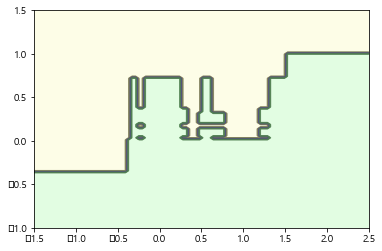

In [247]:
plot_decision_boundary(ada_clf, X, y)

C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


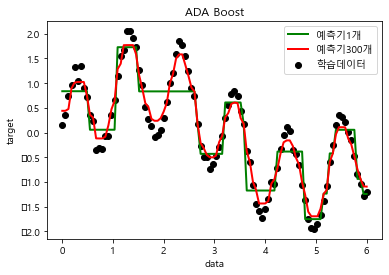

In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
rng = np.random.RandomState(1)
X = np.linspace(0,6,100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0,0.1,X.shape[0])
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X,y)
regr_2.fit(X,y)
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
plt.figure()
plt.scatter(X, y, c="k", label="학습데이터")
plt.plot(X, y_1, c="g", label="예측기1개", linewidth=2)
plt.plot(X, y_2, c="r", label="예측기300개", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("ADA Boost")
plt.legend()
plt.show()

# gradient boost

In [267]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [268]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [269]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [270]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [271]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print('y_pred :', y_pred)

y_pred : [0.75026781]


In [272]:
# 학습률 : 오차
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2,
                                n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X,y)
print("y_pred :", gbrt.predict(X_new))

y_pred : [0.75026781]


In [273]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [284]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

In [275]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [276]:
regressor.feature_importances_

array([0.03661225, 0.        , 0.        , 0.        , 0.        ,
       0.70860238, 0.        , 0.06602406, 0.        , 0.        ,
       0.01040189, 0.        , 0.17835942])

In [277]:
regressor.train_score_

array([23.69756707, 14.26420293, 11.97594327])

In [278]:
regressor.estimators_[0][0].predict(X_test)

array([ 0.2353581 ,  0.2353581 ,  0.2353581 , -7.93778792,  0.2353581 ,
        0.2353581 ,  0.2353581 ,  0.2353581 ,  0.2353581 ,  0.2353581 ,
       -7.93778792, -7.93778792, -7.93778792, -7.93778792, 21.96321543,
        8.17579637,  0.2353581 ,  8.17579637,  0.2353581 ,  0.2353581 ,
        0.2353581 ,  0.2353581 ,  0.2353581 ,  0.2353581 ,  0.2353581 ,
        0.2353581 ,  0.2353581 , -7.93778792, 21.96321543, -7.93778792,
       -7.93778792, -7.93778792,  0.2353581 ,  0.2353581 ,  0.2353581 ,
       -7.93778792, -7.93778792,  0.2353581 , -7.93778792, -7.93778792,
        0.2353581 ,  0.2353581 ,  0.2353581 , -7.93778792,  0.2353581 ,
        0.2353581 , -7.93778792, -7.93778792, -7.93778792,  0.2353581 ,
       -7.93778792, -7.93778792,  0.2353581 , 21.96321543, -7.93778792,
       -7.93778792,  0.2353581 ,  0.2353581 ,  0.2353581 , -7.93778792,
        0.2353581 ,  0.2353581 ,  8.17579637,  0.2353581 , -7.93778792,
        0.2353581 , -7.93778792, -7.93778792,  8.17579637,  0.23

In [279]:
# MSE 평가를 한다 : n_estimators 개수를 결정
errors = [mean_squared_error(y_test, y_pred) for y_pred in
         regressor.staged_predict(X_test)]
print(errors)
best_n_estimators = np.argmin(errors)+1 # 에러가 가장 적은 인덱스
best_n_estimators

[31.424688554487044, 38.75067838205317, 39.65400183826039]


1

In [280]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=1)

In [281]:
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.8770555021332163

In [ ]:
- 데이터를 로딩하시오
- 데이터를 확인 (탐색적 데이터 처리)
- 'yes' = 1.0
- 데이터를 8:2로 분할
- GradientBoostingClassifier
- estimators_[0][0] 에 대해 시각화
- 테스트 데이터에 대하여 scoring
- 변수 중요도를 시각화 하고
- GridSearchCV를 이용해서 최적의 파라미터를 확인하시오
    - 중요하다고 생각하는 hyper parameter에 대하여 최적화를 해 (3개이상)

In [3]:
import pandas as pd
df = pd.read_csv("pim.csv",encoding="utf8")
df

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
327,328,2,88,58,26,28.4,0.766,22,No
328,329,9,170,74,31,44.0,0.403,43,Yes
329,330,10,101,76,48,32.9,0.171,63,No
330,331,5,121,72,23,26.2,0.245,30,No


In [4]:
df[["type"]] = df[["type"]].apply(lambda x: x.astype('category').cat.codes)

In [5]:
X = df.drop("npreg",axis=1)
Y = df.npreg

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.8)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01, n_estimators=1000)

In [9]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

In [10]:
gbc.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2831BE4D840)

In [11]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(gbc.estimators_[0][0],out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False)

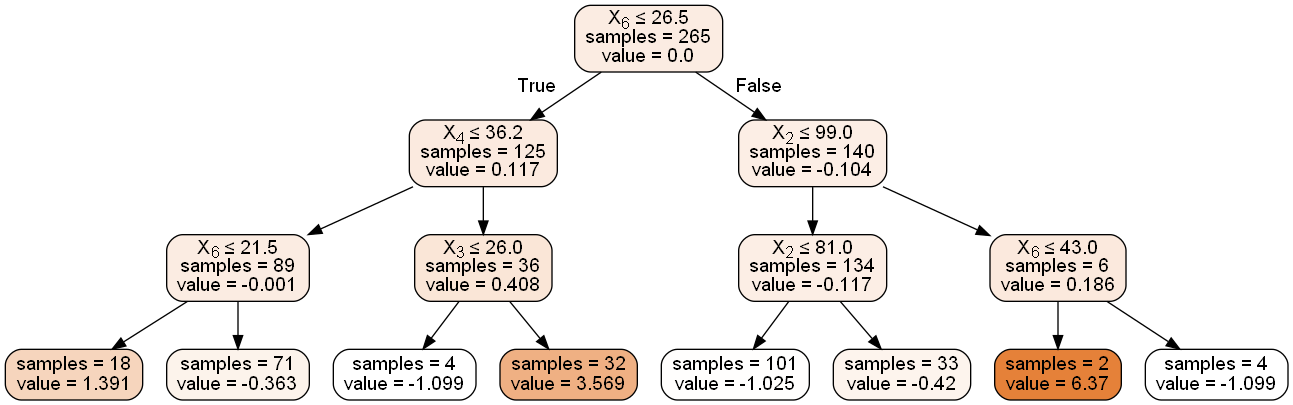

In [13]:
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
gbc.fit(X_test,y_test)
print(gbc.score(X,Y))

0.35240963855421686


In [30]:
gbc.fit(X_train,y_train)
print(gbc.feature_importances_)
df.columns[1:]

[0.20022355 0.11860531 0.103345   0.08462473 0.13169691 0.15794229
 0.1955886  0.00797361]


Index(['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age', 'type'], dtype='object')

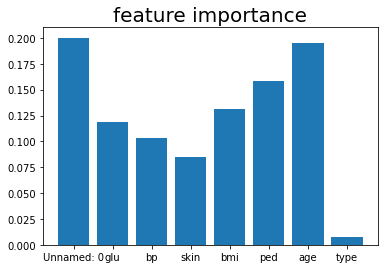

In [47]:
col=df.columns.tolist()
del col[1]
index = np.arange(len(col))
plt.bar(index, gbc.feature_importances_)

plt.title('feature importance', fontsize=20)

plt.xticks(index, col, fontsize=10)

plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [3,5,7],
             'learning_rate': [0.1,0.01,0.05],
             'n_estimators' : [10,100,1000]}
grid = GridSearchCV(gbc,param_grid)
grid.fit(X_train, y_train)

C:\Users\020\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)